## DATA601 - Spring 2022
### HW Assignment 2
Due date: February 24, 23:59 pm

In [ ]:
import numpy as np
import pandas as pd

<b>Intro:</b> Download this zip file and extract it. 
https://github.com/simsekergun/DATA601/raw/main/Datasets/DeviceData.zip

Make sure that your notebook and CSV files are under the same folder. <br>

There are 150 csv files. In each csv file, there are two columns: frequency (f) and efficiency (Q). First column is same in all the csv files. 

The name of the files gives the device parameters. For example, 
"Aphi_AirClad_H410RW855_PulleyCurved_Lc5_G100_W550_Mode1.csv" means that 
- H = 410
- RW = 855
- Lc = 5
- G = 100
- W = 510

<b> Q1. </b> Use pandas to read these csv files with a for loop, create a dataframe called "device_performances", which lists first the device parameters (RW, Lc, G, W) and then all the Q values for each frequncy (from 1800 to 5000 at the steps of 5)
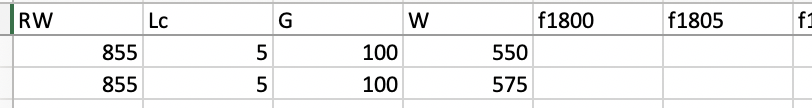

In [24]:
# Your answer is here
import csv
from requests import get
from io import BytesIO
import numpy as np
import pandas as pd
from zipfile import ZipFile
zip_file = ZipFile("DeviceData (2).zip")
files = zip_file.namelist()
for i in files:
  if '_MACOSX' in i:
    files.remove(i)
import codecs
valueArr = []
data = []
rows = []
rowIndex = 0
temp = []
for j in range(len(files)):
  with zip_file.open(files[j],"r") as csvfile:
    csvreader = csv.reader(codecs.iterdecode(csvfile, 'utf-8'))
    filename = csvfile.name
    valueArr = filename.split("_")
    valueHR = valueArr[2].split("R")
    valueH = valueHR[0][1:]
    valueR = valueHR[1][1:]
    temp.append(valueR)
    valueLC = valueArr[4].split("c")[1]
    temp.append(valueLC)
    valueG = valueArr[5].split("G")[1]
    temp.append(valueG)
    valueW = valueArr[6].split("W")[1]
    temp.append(valueW)
    for k in csvreader:
        temp.append(float(k[1]))
    rows.append(temp)
    temp = []
strV = ""
columnsList=['RW', 'LC', 'G', 'W']
for i in range(1800, 5001,5):
    strV = strV + "f" + str(i)
    columnsList.append(strV)
    strV = ""
rowV = []
for i in range (0,645):
    rowV.append(i)
df = pd.DataFrame(rows,
                  columns=columnsList)
df.shape

(150, 645)

<b> Q2. </b> a. Determine the shape of your dataframe <br>
b. Check the first and last rows. <br>
c. Determine the basics statistics (mean, min, max, etc.) <br>
c. Remove the columns if they are all empty (or NaN)  <br>
d. Save your dataframe as a csv file.

In [3]:
# Your answer is here 
# a.
shape = df.shape
print(shape)

(150, 645)


In [25]:
# Your answer is here 
# b.
df.describe()

f1800  f1805  f1810  f1815  f1820  f1825  f1830  f1835  f1840  f1845  \
count    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
mean     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
min      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
25%      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
50%      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
75%      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
max      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

       ...         f4955         f4960         f4965         f4970  \
count  ...  1.500000e+02  1.500000e+02  1.500000e+02  1.500000e+02   
mean   ...  7.929152e+07  8.046807e+07  8.167144e+07  8.289345e+07   
std    ...  1.295971e+08  1.316150e+08  1.336814e+08  1.357822e+08   
min    ...  2.550504e+05  2.569804e+05  2.589215e+05  2.608750e+05   
25%    ...  1.800910e+06  1.818163e+06  1.835691e+06  1.853297e+06   
50%    ...  1.156564e+07  1.170032e+07  1.183791e+07  1.197654e+07   
75%    ...  7.195339e+07  7.296281e+07  7.399831e+07  7.504720e+07   
max    ...  5.202745e+08  5.289413e+08  5.378599e+08  5.469349e+08   

              f4975         f4980         f4985         f4990         f4995  \
count  1.500000e+02  1.500000e+02  1.500000e+02  1.500000e+02  1.500000e+02   
mean   8.413298e+07  8.539013e+07  8.666815e+07  8.796569e+07  8.928070e+07   
std    1.379138e+08  1.400760e+08  1.422772e+08  1.445133e+08  1.467811e+08   
min    2.628499e+05  2.648464e+05  2.668469e+05  2.688633e+05  2.709040e+05   
25%    1.871161e+06  1.889201e+06  1.907363e+06  1.925713e+06  1.944243e+06   
50%    1.211698e+07  1.225933e+07  1.240301e+07  1.254870e+07  1.269557e+07   
75%    7.611037e+07  7.718981e+07  7.828326e+07  7.939233e+07  8.051281e+07   
max    5.561426e+08  5.654813e+08  5.750039e+08  5.846822e+08  5.944958e+08   

              f5000  
count  1.500000e+02  
mean   9.060909e+07  
std    1.490741e+08  
min    2.729267e+05  
25%    1.962758e+06  
50%    1.284344e+07  
75%    8.164861e+07  
max    6.044536e+08  

[8 rows x 641 columns]

In [31]:
# Your answer is here 
# c.
df.dropna(how='all', axis=1, inplace=True)
df.style

In [34]:
# Your answer is here 
df.to_csv('out.csv')

<b> Q3. </b> Read the csv file you created in the previous question again using pandas.
Either using melt or stuck, create a new dataframe which list device parameters (RW, Lc, G, W), frequency, and quantum efficiency in the following format.

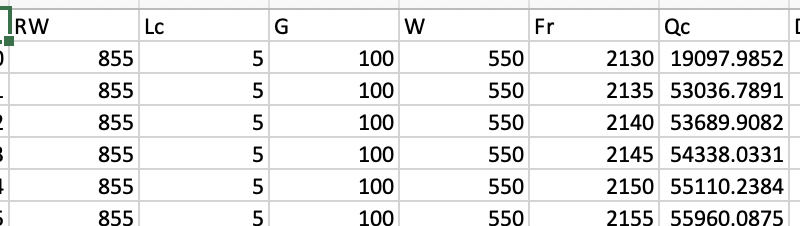

In [35]:
# Your answer is here 
pd.read_csv('./out.csv', index_col = 0)

RW  LC    G    W         f1880       f1885       f1890       f1895  \
0    855   5  100  550           NaN         NaN         NaN         NaN   
1    855   5  100  575           NaN         NaN         NaN         NaN   
2    855   5  100  600           NaN         NaN         NaN         NaN   
3    855   5  100  625           NaN         NaN         NaN         NaN   
4    855   5  100  650  6.528866e+03   8082.1979   8215.8123   8361.5409   
..   ...  ..  ...  ...           ...         ...         ...         ...   
145  855  10  300  550           NaN         NaN         NaN         NaN   
146  855  10  300  575           NaN         NaN         NaN         NaN   
147  855  10  300  600           NaN         NaN         NaN         NaN   
148  855  10  300  625           NaN         NaN         NaN         NaN   
149  855  10  300  650  2.423121e+06  27636.2108  28686.9046  29831.7496   

          f1900       f1905  ...         f4955         f4960         f4965  \
0           NaN         NaN  ...  6.088604e+05  6.133014e+05  6.177619e+05   
1           NaN         NaN  ...  5.958648e+05  6.004952e+05  6.051444e+05   
2           NaN         NaN  ...  5.988471e+05  6.037101e+05  6.085920e+05   
3           NaN         NaN  ...  6.226444e+05  6.278760e+05  6.331275e+05   
4     8522.2876   8692.2119  ...  6.522793e+05  6.578979e+05  6.635375e+05   
..          ...         ...  ...           ...           ...           ...   
145         NaN         NaN  ...  3.365030e+08  3.404382e+08  3.444110e+08   
146         NaN         NaN  ...  2.428117e+08  2.460832e+08  2.494059e+08   
147         NaN         NaN  ...  2.028012e+08  2.057614e+08  2.087778e+08   
148         NaN         NaN  ...  1.864983e+08  1.893680e+08  1.922979e+08   
149  31061.5649  32365.9673  ...  1.817952e+08  1.846935e+08  1.876567e+08   

            f4970         f4975         f4980         f4985         f4990  \
0    6.222486e+05  6.267899e+05  6.313857e+05  6.359783e+05  6.406066e+05   
1    6.098201e+05  6.145582e+05  6.193592e+05  6.241498e+05  6.289793e+05   
2    6.135007e+05  6.184797e+05  6.235292e+05  6.285627e+05  6.336380e+05   
3    6.384079e+05  6.437668e+05  6.492047e+05  6.546226e+05  6.600868e+05   
4    6.692076e+05  6.749649e+05  6.808102e+05  6.866310e+05  6.925022e+05   
..            ...           ...           ...           ...           ...   
145  3.484360e+08  3.525170e+08  3.566557e+08  3.608464e+08  3.650933e+08   
146  2.527763e+08  2.561943e+08  2.596599e+08  2.631764e+08  2.667432e+08   
147  2.118404e+08  2.149471e+08  2.180980e+08  2.212993e+08  2.245486e+08   
148  1.952747e+08  1.982953e+08  2.013598e+08  2.044763e+08  2.076411e+08   
149  1.906687e+08  1.937259e+08  1.968284e+08  1.999855e+08  2.031928e+08   

            f4995         f5000  
0    6.452989e+05  6.499259e+05  
1    6.338827e+05  6.387266e+05  
2    6.387970e+05  6.439003e+05  
3    6.656446e+05  6.711485e+05  
4    6.984778e+05  7.044012e+05  
..            ...           ...  
145  3.694003e+08  3.737069e+08  
146  2.703597e+08  2.739941e+08  
147  2.278439e+08  2.311653e+08  
148  2.108516e+08  2.140938e+08  
149  2.064472e+08  2.097381e+08  

[150 rows x 629 columns]

<b> Q4. </b> Read the following dataset with pandas.
https://raw.githubusercontent.com/simsekergun/DATA601/main/Datasets/multiindex_dataset.csv



In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/simsekergun/DATA601/main/Datasets/multiindex_dataset.csv', parse_dates=['Date'])

In [10]:
df.head(5)

Date    Store Category Subcategory       UPC EAN  \
0 2018-07-11  Store 3     Beer        Ales  736920111112   
1 2018-07-11  Store 2     Beer        Ales  736920111112   
2 2018-07-10  Store 3     Beer        Ales  736920111112   
3 2018-07-10  Store 2     Beer        Ales  736920111112   
4 2018-07-12  Store 3     Beer        Ales  736920111112   

                           Description  Dollars  Units  
0  Goose Island - Honkers Ale - 6 Pack    35.68      4  
1  Goose Island - Honkers Ale - 6 Pack   166.74     14  
2  Goose Island - Honkers Ale - 6 Pack    67.36      8  
3  Goose Island - Honkers Ale - 6 Pack    80.01      9  
4  Goose Island - Honkers Ale - 6 Pack    78.30     10

Use multiindexing and determine <br>
a. How much total money has been made in each store <br>
b. How many units have been sold <br>
c. Which store sold the highest number of beer units <br>
d. Most profitable product (profit = $$/unit)


In [11]:
df.groupby('Store').sum()[['Dollars']]

Dollars
Store           
Store 1  1649.40
Store 2  8221.65
Store 3  9073.29

In [12]:
df.groupby('Store').sum()[['Units']]

Units
Store         
Store 1    182
Store 2    454
Store 3    572

In [19]:
df.groupby(['Store','Category']).sum()[['Units']].sort_values('Units',ascending=False).head(1)
                                                                                        


Units
Store   Category       
Store 3 Beer        274

In [23]:
df['profit']=df.Dollars/df.Units
df.groupby('Description').sum()[['profit']].sort_values('profit',ascending=False).head(1)

profit
Description                                              
Glenlivet - 12 Year Scotch Whisky - 750 mL Bottle  440.66